In [1]:
%load_ext autoreload
%autoreload 2
from corr_study.datasetApi import *
from corr_study.correlation import *
from corr_study.voxels import *
from corr_study.mobileclassifier import *
from matplotlib import pyplot as plt

dataset = Dataset("corr_study/dataset/")

route = dataset.get_routes_TLC()[0]
ids = dataset.get_ids_CV(Town.T1, Weather.Clear, Time.Sunset, Sensor.LFL)

route = dataset.get_routes_TLC()[0]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2023-03-14 14:19:12.989612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# tf.compat.v1.disable_eager_execution()
tf.executing_eagerly()

False

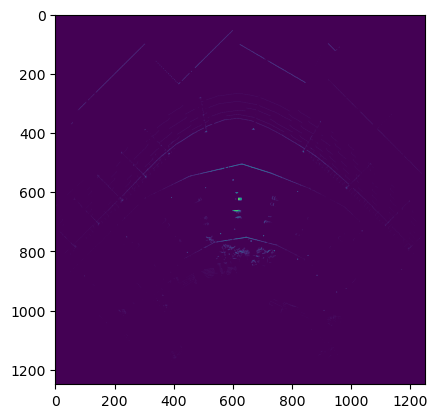

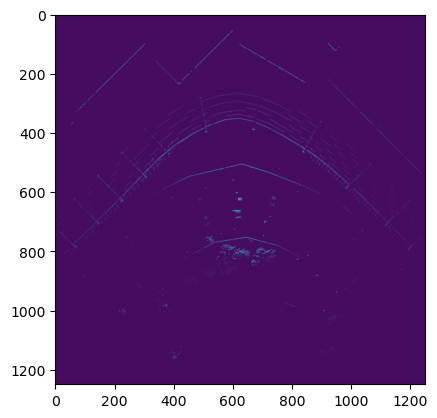

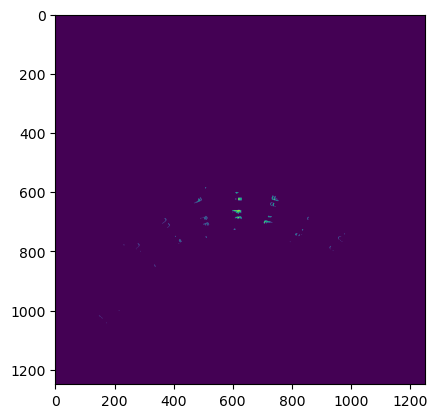

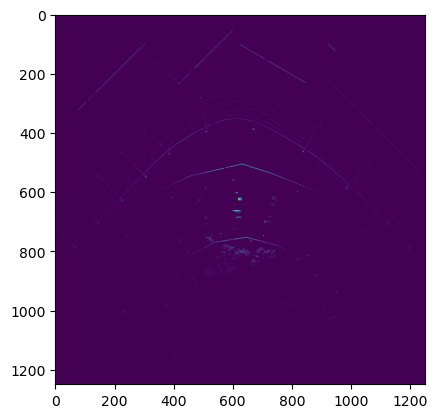

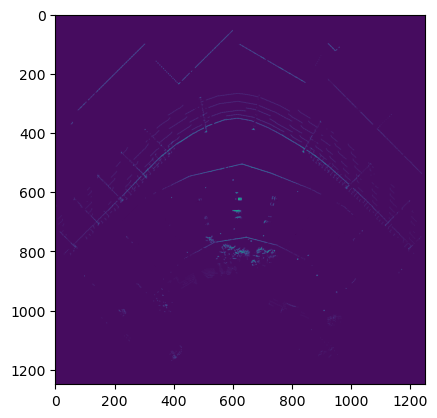

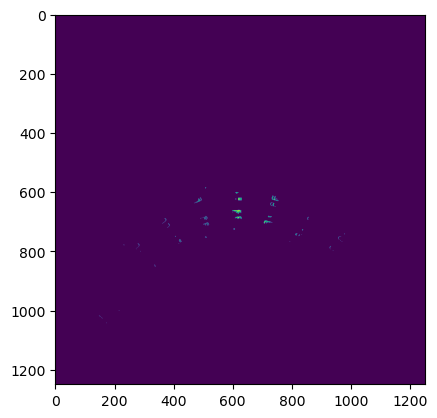

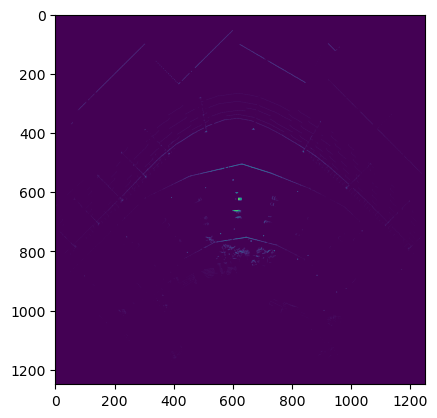

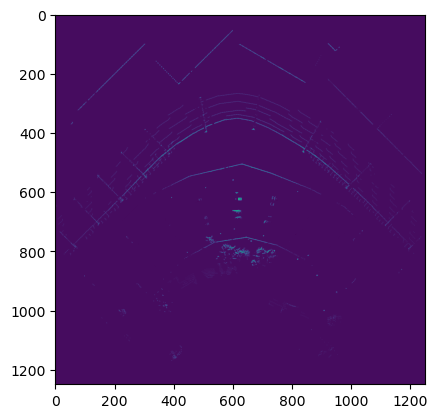

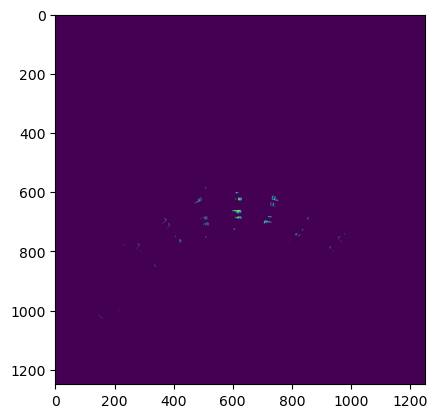

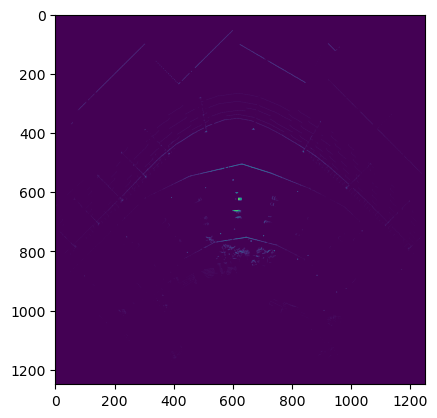

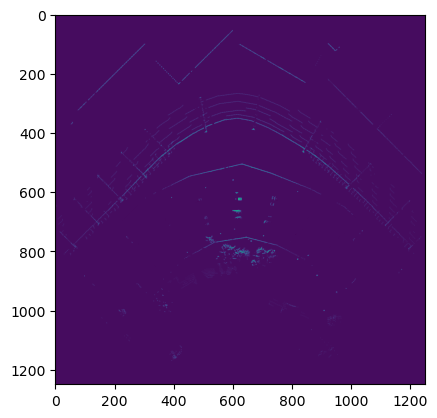

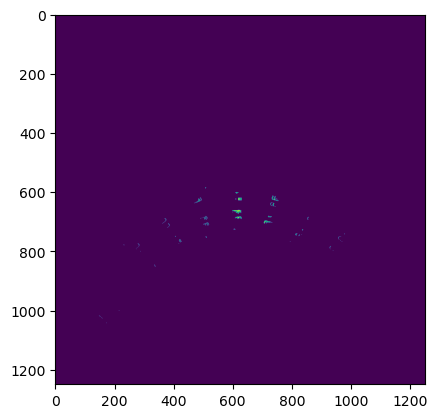

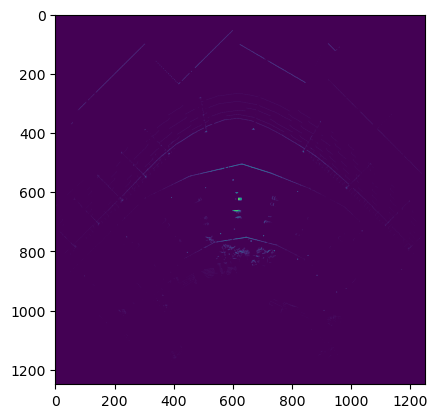

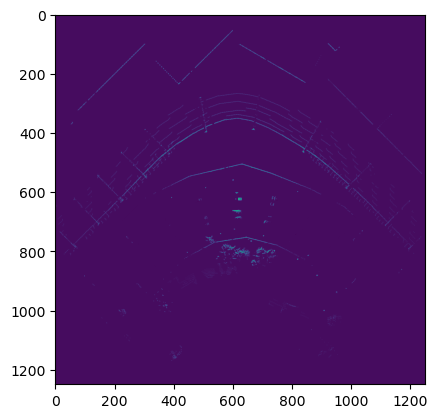

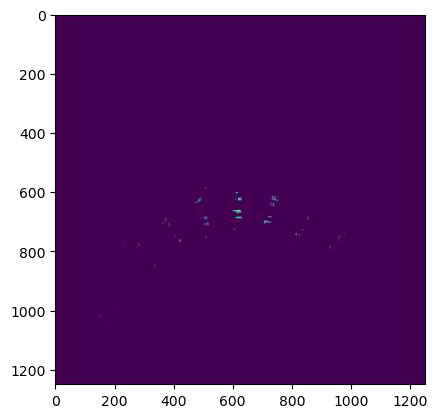

In [40]:
tfds = create_tf_dataset(dataset, [["t3high", Weather.Clear, Time.Sunset, Sensor.LT]])
from matplotlib import pyplot as plt
for x, y in tfds:
    plt.imshow(x[:,:,0])
    plt.show()
    plt.imshow(x[:,:,1])
    plt.show()
    plt.imshow(y)
    plt.show()

In [2]:
pcd_top = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_voxels(pcd_top_compare, 0.25, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_correlation.append(correla)

In [4]:
pcd_top = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_cluster_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_cluster_correlation.append(correla)

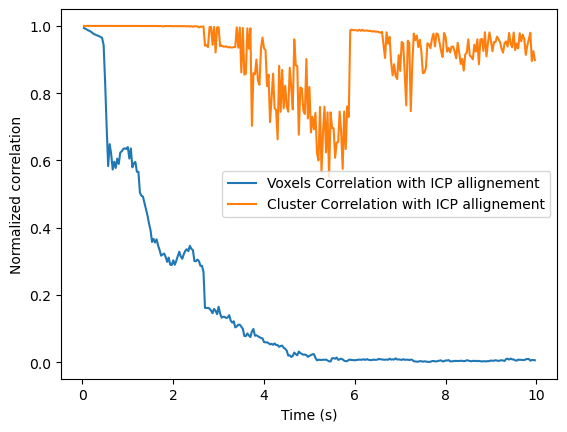

In [5]:
fig, ax = plt.subplots(1,1)
pp, = ax.plot(np.arange(1,300)/30, icp_correlation)
pc, = ax.plot(np.arange(1,300)/30, icp_cluster_correlation)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Normalized correlation")
ax.legend([pp, pc],["Voxels Correlation with ICP allignement", "Cluster Correlation with ICP allignement"])
plt.show()

In [59]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_cluster_mse = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation, return_mse=True)
    icp_cluster_mse.append(correla)

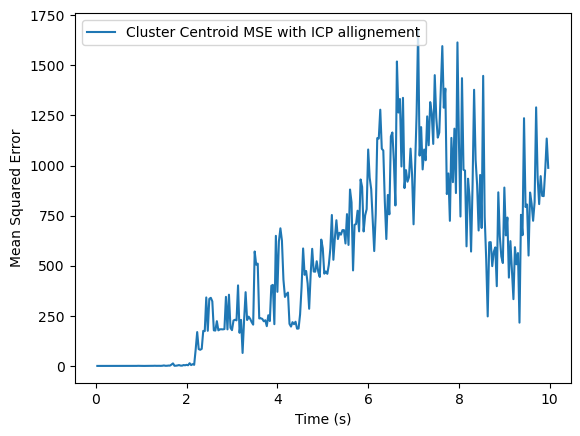

In [60]:
fig, ax = plt.subplots(1,1)
pmse, = ax.plot(np.arange(1,300)/30, icp_cluster_mse)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Mean Squared Error")
ax.legend([pmse],["Cluster Centroid MSE with ICP allignement"])
plt.show()

In [50]:

pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 120)
correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 30, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=None)

In [5]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5))

In [7]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
corr = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    corr.append(v_top.compute_correlation(pcd_top_compare.voxelize(0.5, v_top.boundaries)))


In [8]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
v_top = pcd_top.voxelize(0.5)
cross_corr = []
for i in range(1, 101, 1):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    cross_corr.append(v_top.compute_correlation_inferring_offset(pcd_top_compare.voxelize(0.5, v_top.boundaries)))

In [9]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
center_mass_corr_weighted = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    center_mass_corr_weighted.append(pcd_top.compare_using_voxels(pcd_top_compare, 0.5, weighted=True))

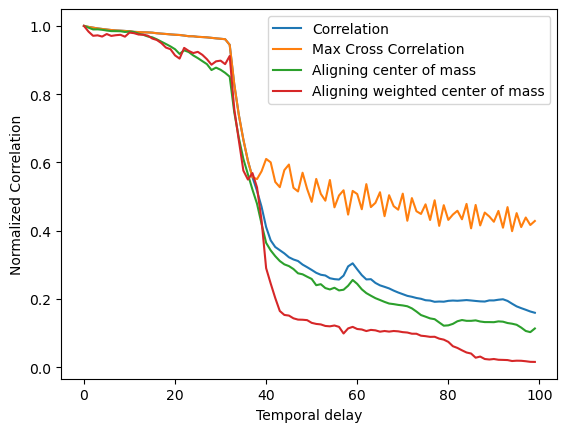

In [10]:
fig, ax = plt.subplots(1,1)
c, = ax.plot(corr)
cc, = ax.plot(cross_corr)
cm, = ax.plot(center_mass_corr)
cmw, = ax.plot(center_mass_corr_weighted)
ax.legend([c, cc, cm, cmw], ["Correlation", "Max Cross Correlation", "Aligning center of mass", "Aligning weighted center of mass"])
plt.ylabel("Normalized Correlation")
plt.xlabel("Temporal delay")
plt.show()

In [30]:
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 32).visualize()
dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 35).visualize()

In [3]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
mse_mass_center = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    mse_mass_center.append(pcd_top.compare_using_clusters(pcd_top_compare, 10))


In [4]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
mse_mass_center_w = []
for i in range(1, 101):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    mse_mass_center_w.append(pcd_top.compare_using_clusters(pcd_top_compare, 10, weighted=True))


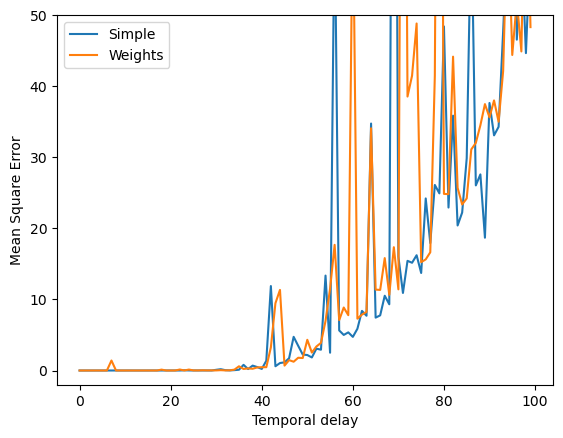

In [5]:
fig, ax = plt.subplots(1,1)
s, = ax.plot(mse_mass_center)
w, = ax.plot(mse_mass_center_w)
ax.legend([s, w], ["Simple", "Weights"])
plt.ylabel("Mean Square Error")
plt.xlabel("Temporal delay")
ax.set_ylim([-2,50])
plt.show()

In [13]:
def compute_oddly_normalized_distance(points):
    dists_matrix = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=-1))
    distances = np.sqrt(np.sum(points ** 2, axis=1))
    distances = distances[:, np.newaxis]* distances
    return dists_matrix/distances

clustering = DBSCAN(eps=0.001, min_samples=10, metric="precomputed").fit(compute_oddly_normalized_distance(pcd_top.data[15000:30000,:]))
clusters = SelmaPointCloud(pcd_top.data[15000:30000,:], clustering.labels_)
clusters.visualize()

In [65]:
pcd_1 = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
pcd_2 = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 2)
a = np.zeros(pcd_1.data.shape[0], dtype=int) - 1
b = np.zeros(pcd_2.data.shape[0], dtype=int) + 1
gt = np.concatenate((a,b))

SelmaPointCloud(np.concatenate((pcd_1.data, pcd_2.data), axis = 0), ground_truth=gt).visualize()

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Handle non valido. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L'operazione di trasformazione richiesta non è supportata. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L'operazione di trasformazione richiesta non è supportata. 


In [96]:
pcd_top = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, 1)
target = []
for i in range(1, 11):
    pcd_top_compare = dataset.open_measurement_sample_TLC("00000000_000000", Weather.Clear, Time.Sunset, Sensor.LT, i)
    target.append(pcd_top_compare.data)
mse = pcd_top.compare_using_dbscan(target, 0.05, 100)
print(mse)

100%|██████████| 43/43 [00:32<00:00,  1.33it/s]
c:\Users\Filippo\Desktop\uni\thesis\pqos-correlation\corr_study\selmaPointCloud.py:202: RuntimeWarning: Mean of empty slice.
  centroid_second = data_second[labels_second == i].mean(axis=0)
 36%|███▌      | 15/42 [00:07<00:08,  3.09it/s]c:\Users\Filippo\Desktop\uni\thesis\pqos-correlation\corr_study\selmaPointCloud.py:183: RuntimeWarning: Mean of empty slice.
  #     centroid_first = first_pointcloud[labels_first == i].mean(axis=0)
100%|██████████| 32/32 [00:13<00:00,  2.37it/s]

[0.06319631789131108, 0.049311042558667174, 0.016931637428582925, 0.01743789419418201, 0.010877727385090167, 0.013613972508210883, 0.012093654171819205, 0.012134498149744159, 0.012158936521786144, 0.011885721548165319]


In [3]:
fp = "/home/filo/thesis/pqos-correlation/corr_study/dataset/TLC_web/archives/t3low/ClearSunset/BBOX.hdf5"
import h5py
import numpy as np
from pathlib import Path

filepath = Path(fp)
loc = None
rot = None
with h5py.File(filepath,'r') as f:
    root_grp = f.get("BBOX")
    ids = list(root_grp.keys())
    ego = root_grp.get("0194")
    loc = np.array(ego.get('location'))
    rot = np.array(ego.get('rotation'))
print(rot.min())

-179.9951


In [1]:
import open3d as o3d
import seaborn as sns

def create_homogeneous_matrix(x, y, z, pitch, yaw, roll):
    # Convert pitch, yaw, and roll angles to radians
    pitch = np.radians(pitch)
    yaw = np.radians(yaw)
    roll = np.radians(roll)

    # Create rotation matrices for each angle
    Rx = np.array([[1, 0, 0], [0, np.cos(pitch), -np.sin(pitch)], [0, np.sin(pitch), np.cos(pitch)]])
    Ry = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]])
    Rz = np.array([[np.cos(roll), -np.sin(roll), 0], [np.sin(roll), np.cos(roll), 0], [0, 0, 1]])

    # Combine the rotation matrices
    R = np.dot(Rz, np.dot(Ry, Rx))

    # Create the translation vector
    t = np.array([[x], [y], [z]])

    # Combine the rotation matrix and translation vector into a homogeneous matrix
    T = np.hstack((R, t))
    T = np.vstack((T, np.array([0, 0, 0, 1])))

    return T
freq =25
samples = int(np.floor(3325/freq))-3
pointclouds = []
for i in range(samples):
    m = create_homogeneous_matrix(-loc[i*freq,1], -loc[i*freq,0], -loc[i*freq,2], 180-rot[i*freq,0], 180-rot[i*freq,2], 180-rot[i*freq,1])
    lt = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i*freq+1)
    pc = o3d.geometry.PointCloud()
    pc.points = o3d.utility.Vector3dVector(lt.data)
    palette = sns.color_palette("hls", n_colors=36)
    get_color = lambda tag:palette[tag%36] if tag != -1 else (1.0,1.0,1.0)
    colors = np.array(np.vectorize(get_color)(lt.ground_truth[:,0])).T
    pc.colors = o3d.utility.Vector3dVector(colors)
    pc.transform(m)
    pointclouds.append(pc)

o3d.visualization.draw_geometries(pointclouds)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


NameError: name 'np' is not defined

[146, 147, 149, 151, 194, 218, 258, 334, 337, 343, 419, 421, 424, 427, 458, 506, 508, 563, 637, 667, 673, 'Time (s)']


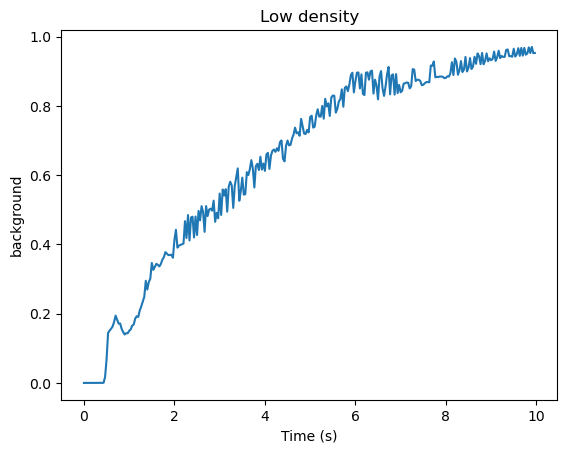

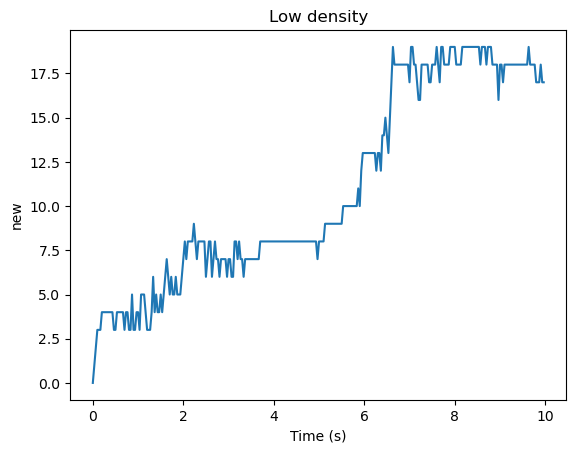

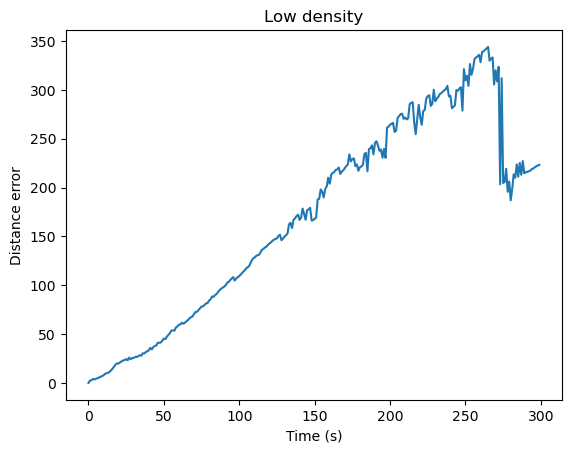

In [84]:
from corr_study.truthsetter import *
import pandas as pd
time = 300
fp = "/home/filo/thesis/pqos-correlation/corr_study/dataset/TLC_web/archives/t3low/ClearSunset/BBOX.hdf5"
dicts = find_truth(fp, 1, time, dataset, "t3low",  Weather.Clear, Time.Sunset, Sensor.LT)
df_low = pd.DataFrame.from_dict(dicts)
df_low["Time (s)"] = np.arange(time)/30

others_low = list(df_low.columns)
others_low.remove("new")
others_low.remove("background")
print(others_low)
sns.lineplot(data=df_low, x="Time (s)", y="background", legend=False)
plt.title("Low density")
plt.show()
sns.lineplot(data=df_low, x="Time (s)", y="new", legend=False)
plt.title("Low density")
plt.show()
sns.lineplot(data=df_low[others_low].sum(axis=1), legend=False)
plt.xlabel("Time (s)")
plt.ylabel("Distance error")
plt.title("Low density")
plt.show()

[109, 118, 143, 152, 160, 167, 168, 208, 209, 211, 213, 275, 285, 316, 319, 341, 342, 364, 371, 380, 385, 405, 407, 410, 436, 459, 481, 487, 501, 504, 507, 510, 515, 529, 586, 589, 595, 646, 680, 'Time (s)']


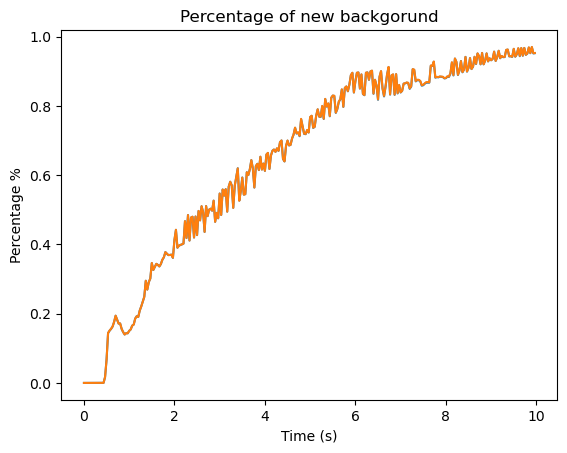

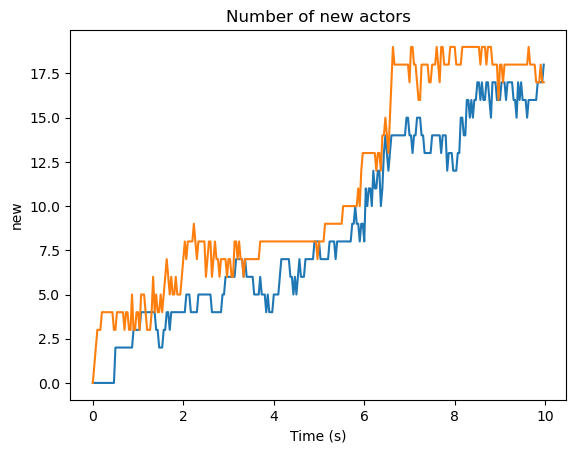

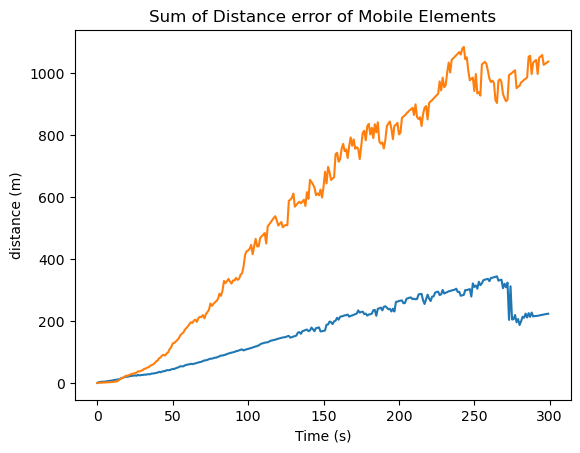

In [87]:
time = 300
fp = "/home/filo/thesis/pqos-correlation/corr_study/dataset/TLC_web/archives/t3high/ClearSunset/BBOX.hdf5"
dicts = find_truth(fp, 1, time, dataset, "t3high",  Weather.Clear, Time.Sunset, Sensor.LT)
df = pd.DataFrame.from_dict(dicts)
df["Time (s)"] = np.arange(time)/30
others = list(df.columns)
others.remove("new")
others.remove("background")
print(others)
sns.lineplot(data=df, x="Time (s)", y="background", legend=False)
sns.lineplot(data=df_low, x="Time (s)", y="background", legend=False)
plt.ylabel("Percentage %")
plt.title("Percentage of new backgorund")
plt.show()
sns.lineplot(data=df, x="Time (s)", y="new", legend=False)
sns.lineplot(data=df_low, x="Time (s)", y="new", legend=False)
plt.title("Number of new actors")
plt.show()
sns.lineplot(data=df_low[others_low].sum(axis=1), legend=False)
sns.lineplot(data=df[others].sum(axis=1), legend=False)
plt.xlabel("Time (s)")
plt.ylabel("distance (m)")
plt.title("Sum of Distance error of Mobile Elements")
plt.show()

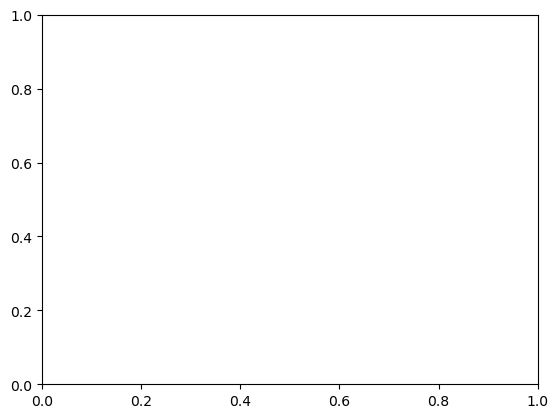

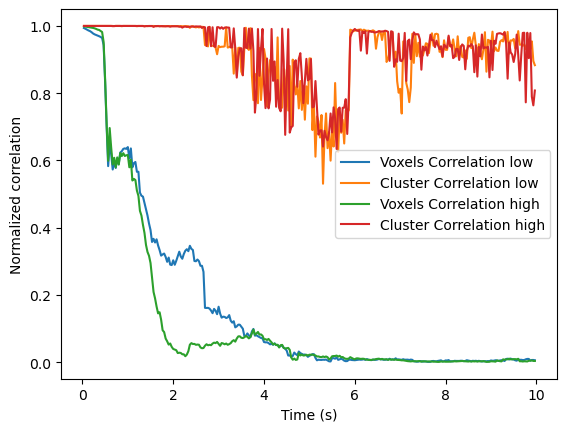

In [90]:
pcd_top = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_correlation_low = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_voxels(pcd_top_compare, 0.25, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_correlation_low.append(correla)
icp_cluster_correlation_low = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3low", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_cluster_correlation_low.append(correla)
pcd_top = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_voxels(pcd_top_compare, 0.25, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_correlation.append(correla)
icp_cluster_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_cluster_correlation.append(correla)
fig, ax = plt.subplots(1,1)
ppl, = ax.plot(np.arange(1,300)/30, icp_correlation_low)
pcl, = ax.plot(np.arange(1,300)/30, icp_cluster_correlation_low)
pp, = ax.plot(np.arange(1,300)/30, icp_correlation)
pc, = ax.plot(np.arange(1,300)/30, icp_cluster_correlation)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Normalized correlation")
ax.legend([ppl, pcl, pp, pc],["Voxels Correlation low", "Cluster Correlation low", "Voxels Correlation high", "Cluster Correlation high"])
plt.show()

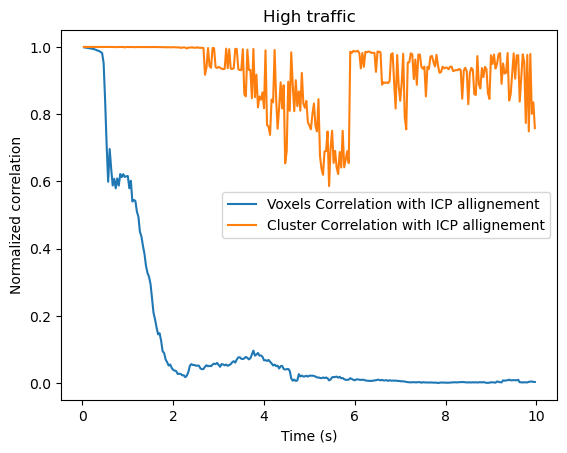

In [89]:
pcd_top = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, 1)
icp_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_voxels(pcd_top_compare, 0.25, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_correlation.append(correla)
icp_cluster_correlation = []
previous_transformation = None
for i in range(2, 301):
    pcd_top_compare = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, i)
    correla, previous_transformation = pcd_top.compare_using_clusters(pcd_top_compare, 50, mode=selmaPointCloud.ICP_REGISTRATION, crop_street=True, init_transform=previous_transformation)
    icp_cluster_correlation.append(correla)
fig, ax = plt.subplots(1,1)
pp, = ax.plot(np.arange(1,300)/30, icp_correlation)
pc, = ax.plot(np.arange(1,300)/30, icp_cluster_correlation)
ax.set_title("High traffic")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Normalized correlation")
ax.legend([pp, pc],["Voxels Correlation with ICP allignement", "Cluster Correlation with ICP allignement"])
plt.show()

In [4]:
import open3d as o3d
from matplotlib import pyplot as plt
pcd_top = dataset.open_measurement_sample_TLC("t3high", Weather.Clear, Time.Sunset, Sensor.LT, 1)
dd = pcd_top.data
# dd = dd[pcd_top.ground_truth[:,1] != 0]
dd = dd[dd[:,2]>-0.9]
dd[:,2] = 0

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(dd)


with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=2, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])



[0. 0. 0. ... 0. 0. 0.]
[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 63
Precompute neighbors.[========================================] 100%
point cloud has 63 clusters=======================>] 97%[=======>                                ] 17%
